In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import math
import os
import collections
import dscrutils2py as dscrutils
import dsc_extract

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
from pymir import mpl_stylesheet
from pymir import mpl_utils
from pymir import pd_utils

import methodprops
import methodplots

mpl_stylesheet.banskt_presentation(splinecolor = 'black')

In [8]:
dsc_outdir = os.path.realpath("../dsc/dsc_result_changepoint")
dims       = (500, 500)
targets    = ["changepoint", "changepoint.dims", "changepoint.se", "changepoint.sfix", 
              "changepoint.basis_k", "changepoint.snr",
              "fit_cpt", "fit_cpt.DSC_TIME", "mse.err"]
# methods = ["ridge", "lasso", "lasso_1se", "elastic_net",
#            "elastic_net_1se", "l0learn", "scad", "mcp", 
#            "susie", "varbvs", "blasso", "bayesb",
#            "mr_ash", "mr_ash_init", "em_vamp", "em_vamp_ash"]
methods = ["ridge", "mr_ash", "lasso", "ebmr_ashR"]
conditions = None
orders = [0, 1, 2]
knots  = [1, 2]
#conditions = [f"$(fit) == '{method}'"]
groups = ["fit:"]

In [9]:
dscout = dscrutils.dscquery(dsc_outdir, targets, groups = groups)
dscout['score1'] = np.sqrt(dscout['mse.err'])/dscout['changepoint.se']

[1] "fit:"
Calling: dsc-query /home/saikat/Documents/work/sparse-regression/simulation/eb-linreg-dsc/dsc/dsc_result_changepoint -o /tmp/RtmpNZQlBD/file2acc534bd2e9.csv --target "changepoint changepoint.dims changepoint.se changepoint.sfix changepoint.basis_k changepoint.snr fit_cpt fit_cpt.DSC_TIME mse.err" --force -g "fit:" 
Loaded dscquery output table with 6240 rows and 11 columns.



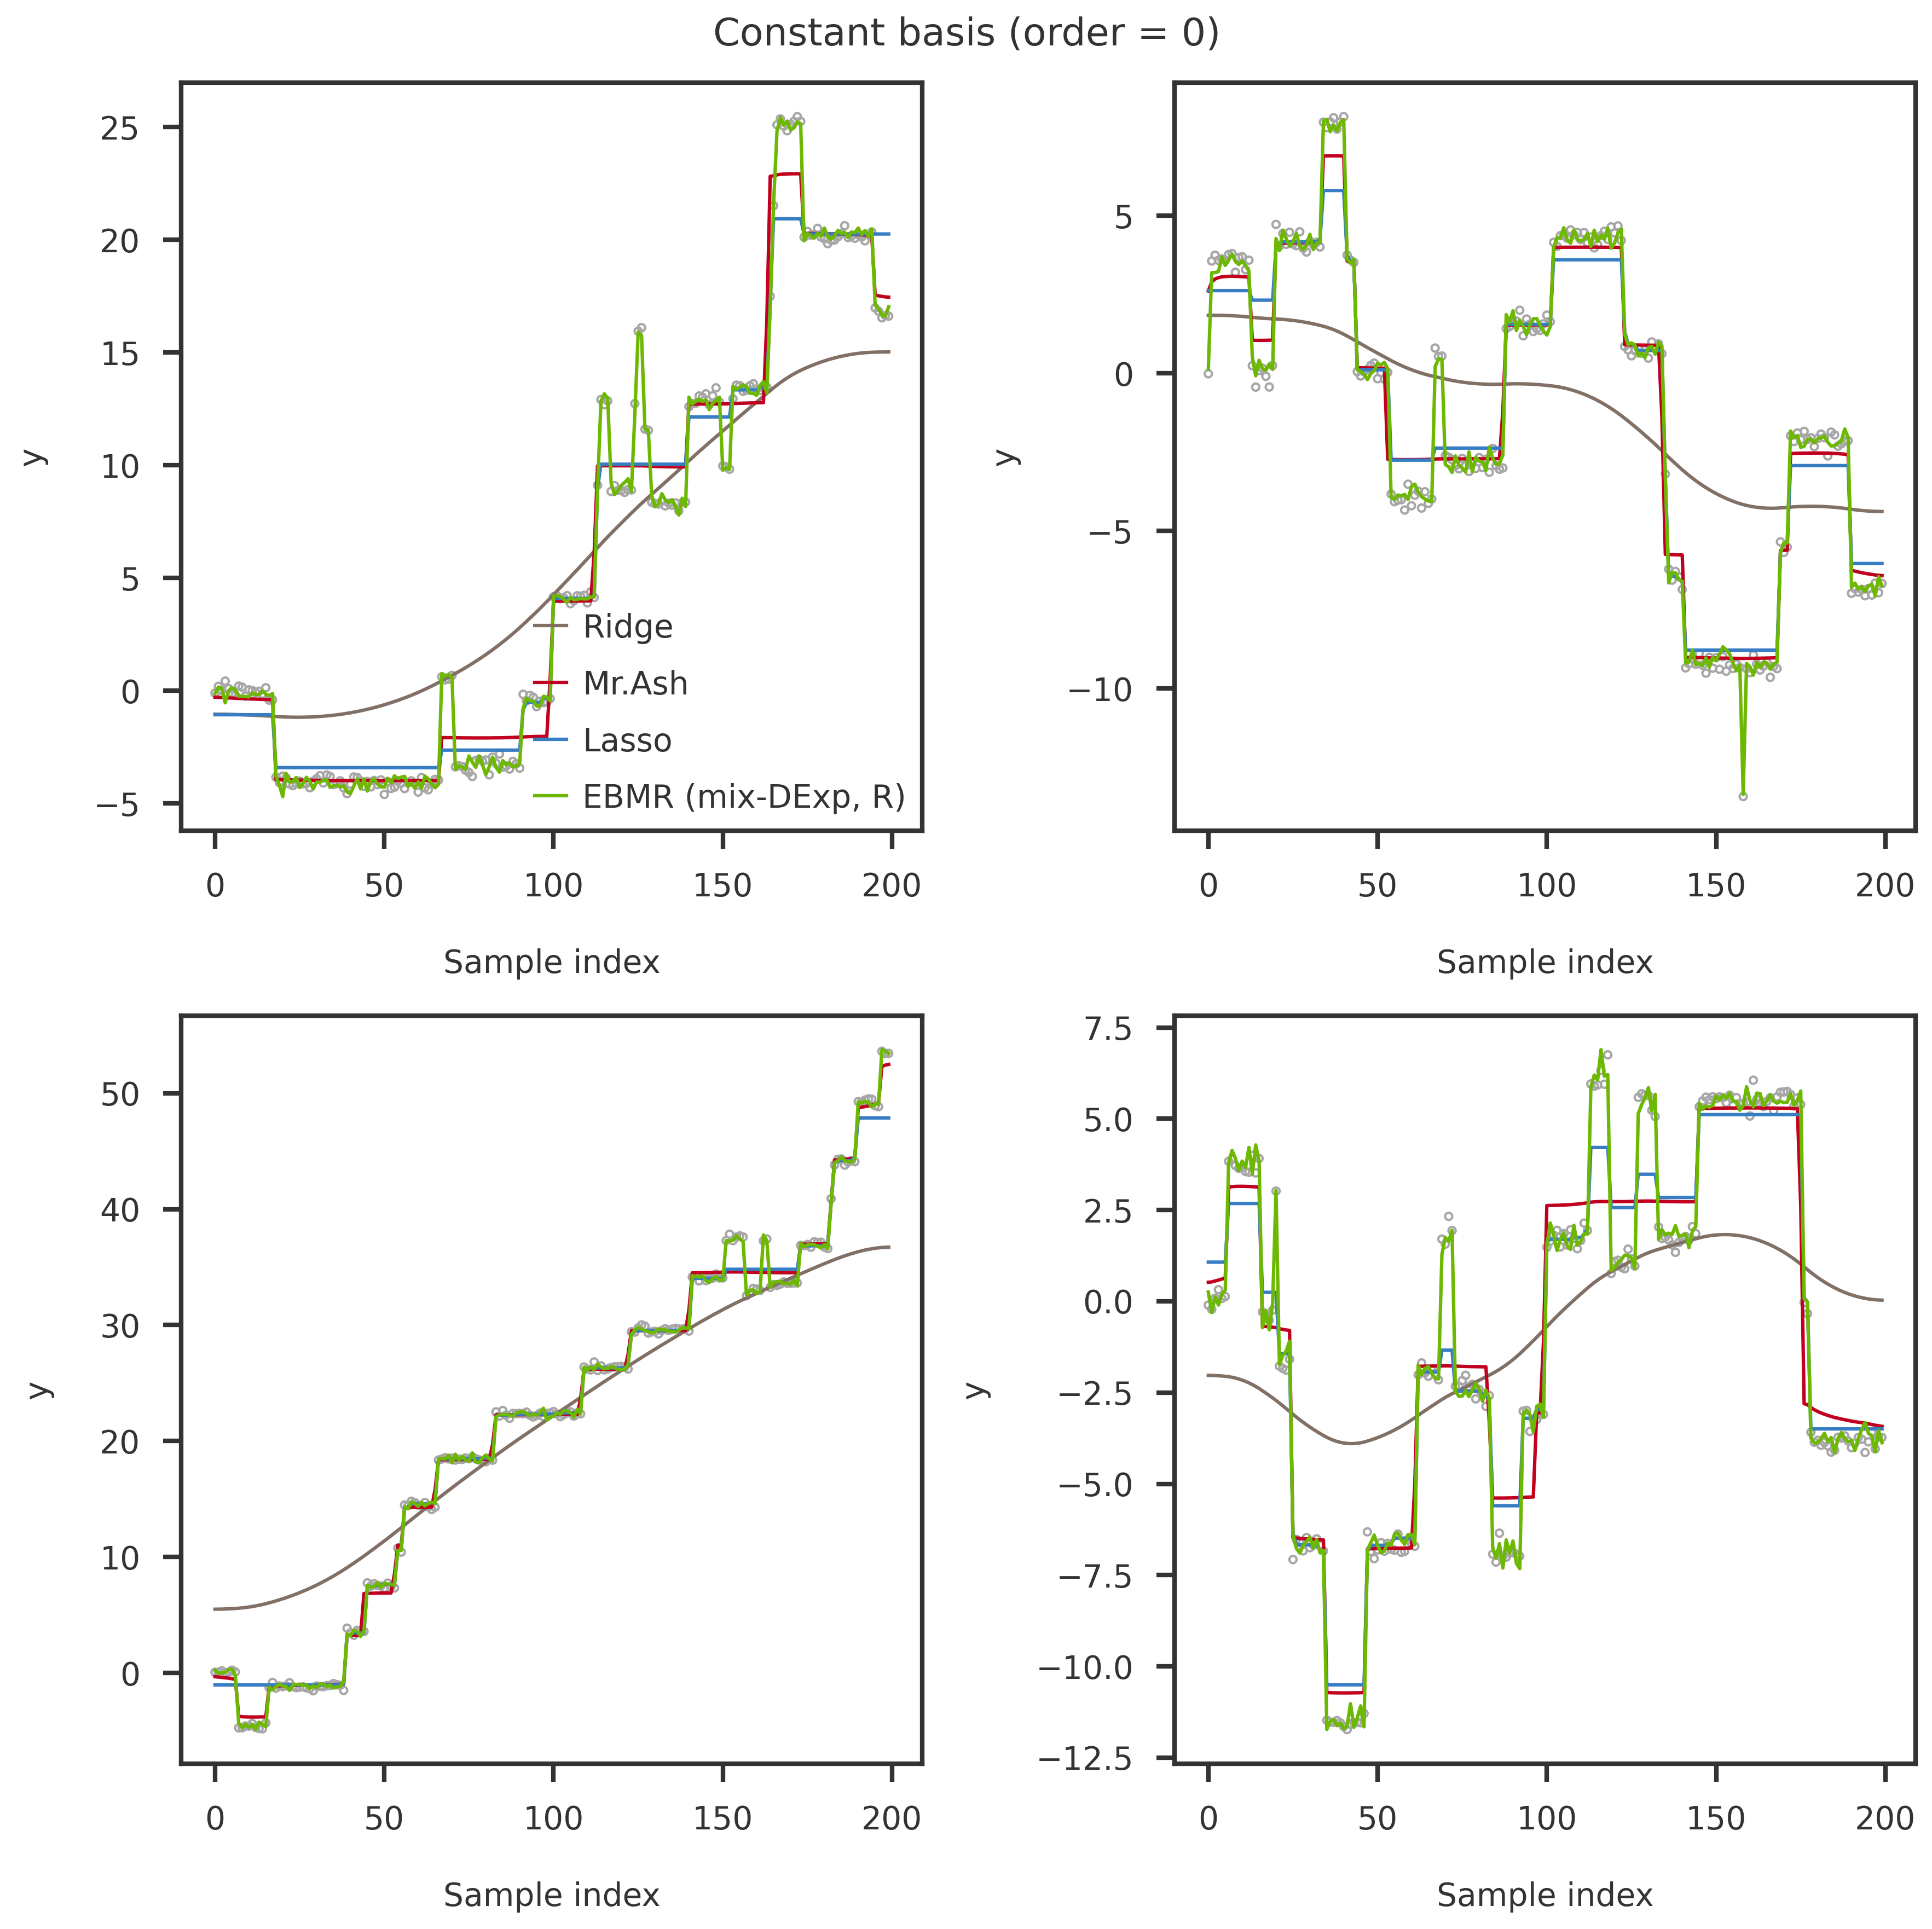

In [10]:
fig = plt.figure(figsize = (12, 12))
axlist = list()
plot_iter = [1, 2, 3, 14]
order = 0
sfix = 20
mhandles = list()
mlabels = list()
for i, it in enumerate(plot_iter):
    ax = fig.add_subplot(2, 2, i+1)
    X, y, Xtest, ytest, beta, se, ypred, b0pred, b1pred \
        = dsc_extract.changepoint_predictions(dsc_outdir, methods,
                                              order = order, sfix = sfix, dsc_iter = it)
    ax.scatter(np.arange(y.shape[0]), ytest, color = '#A7A7A7', facecolor = 'None', s = 10)
    for method in methods: 
        pm = methodprops.plot_metainfo()[method]
        ax.plot(np.arange(y.shape[0]), ypred[method], color = pm.color, label = pm.label)
        if i == 0:
            ax.legend(loc = 'lower right')
    ax.set_xlabel('Sample index')
    ax.set_ylabel('y')
    axlist.append(ax)
fig.suptitle('Constant basis (order = 0)')
plt.tight_layout()
plt.show()

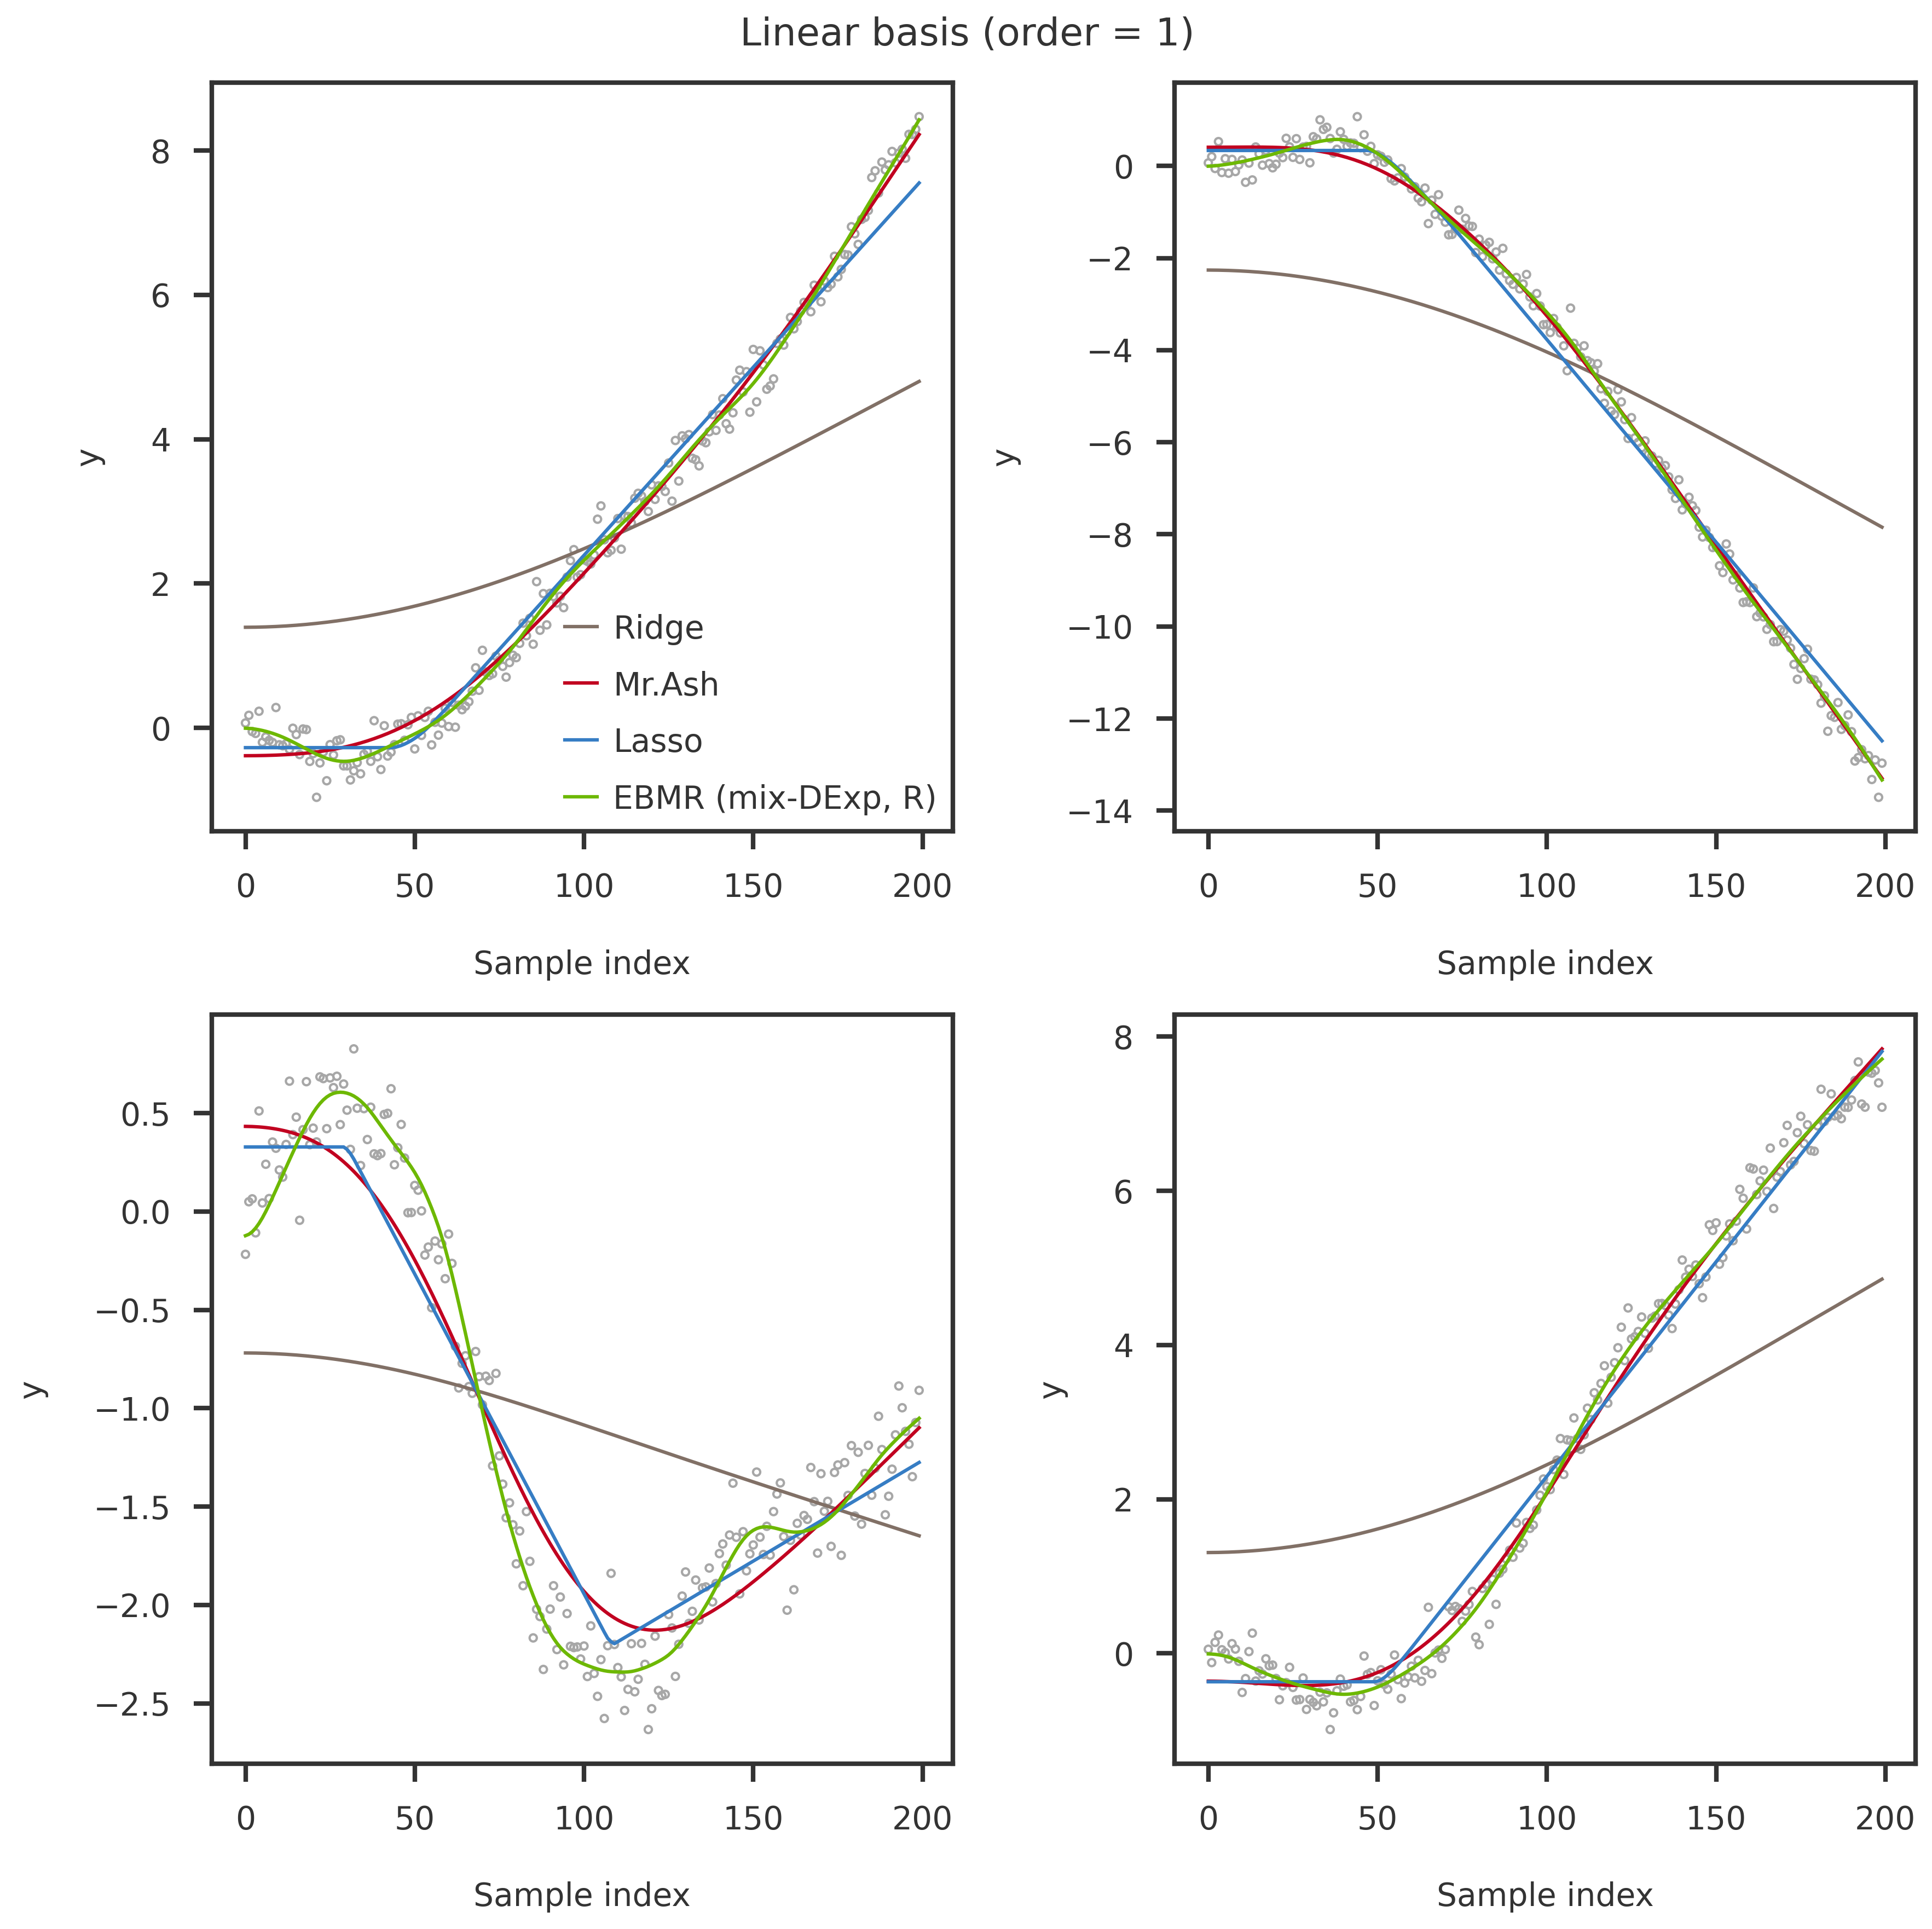

In [11]:
fig = plt.figure(figsize = (12, 12))
axlist = list()
plot_iter = [1, 11, 3, 14]
order = 1
sfix = 20
mhandles = list()
mlabels = list()
for i, it in enumerate(plot_iter):
    ax = fig.add_subplot(2, 2, i+1)
    X, y, Xtest, ytest, beta, se, ypred, b0pred, b1pred \
        = dsc_extract.changepoint_predictions(dsc_outdir, methods,
                                              order = order, sfix = sfix, dsc_iter = it)
    ax.scatter(np.arange(y.shape[0]), ytest, color = '#A7A7A7', facecolor = 'None', s = 10)
    for method in methods: 
        pm = methodprops.plot_metainfo()[method]
        ax.plot(np.arange(y.shape[0]), ypred[method], color = pm.color, label = pm.label)
        if i == 0:
            ax.legend(loc = 'lower right')
    ax.set_xlabel('Sample index')
    ax.set_ylabel('y')
    axlist.append(ax)
fig.suptitle('Linear basis (order = 1)')
plt.tight_layout()
plt.show()

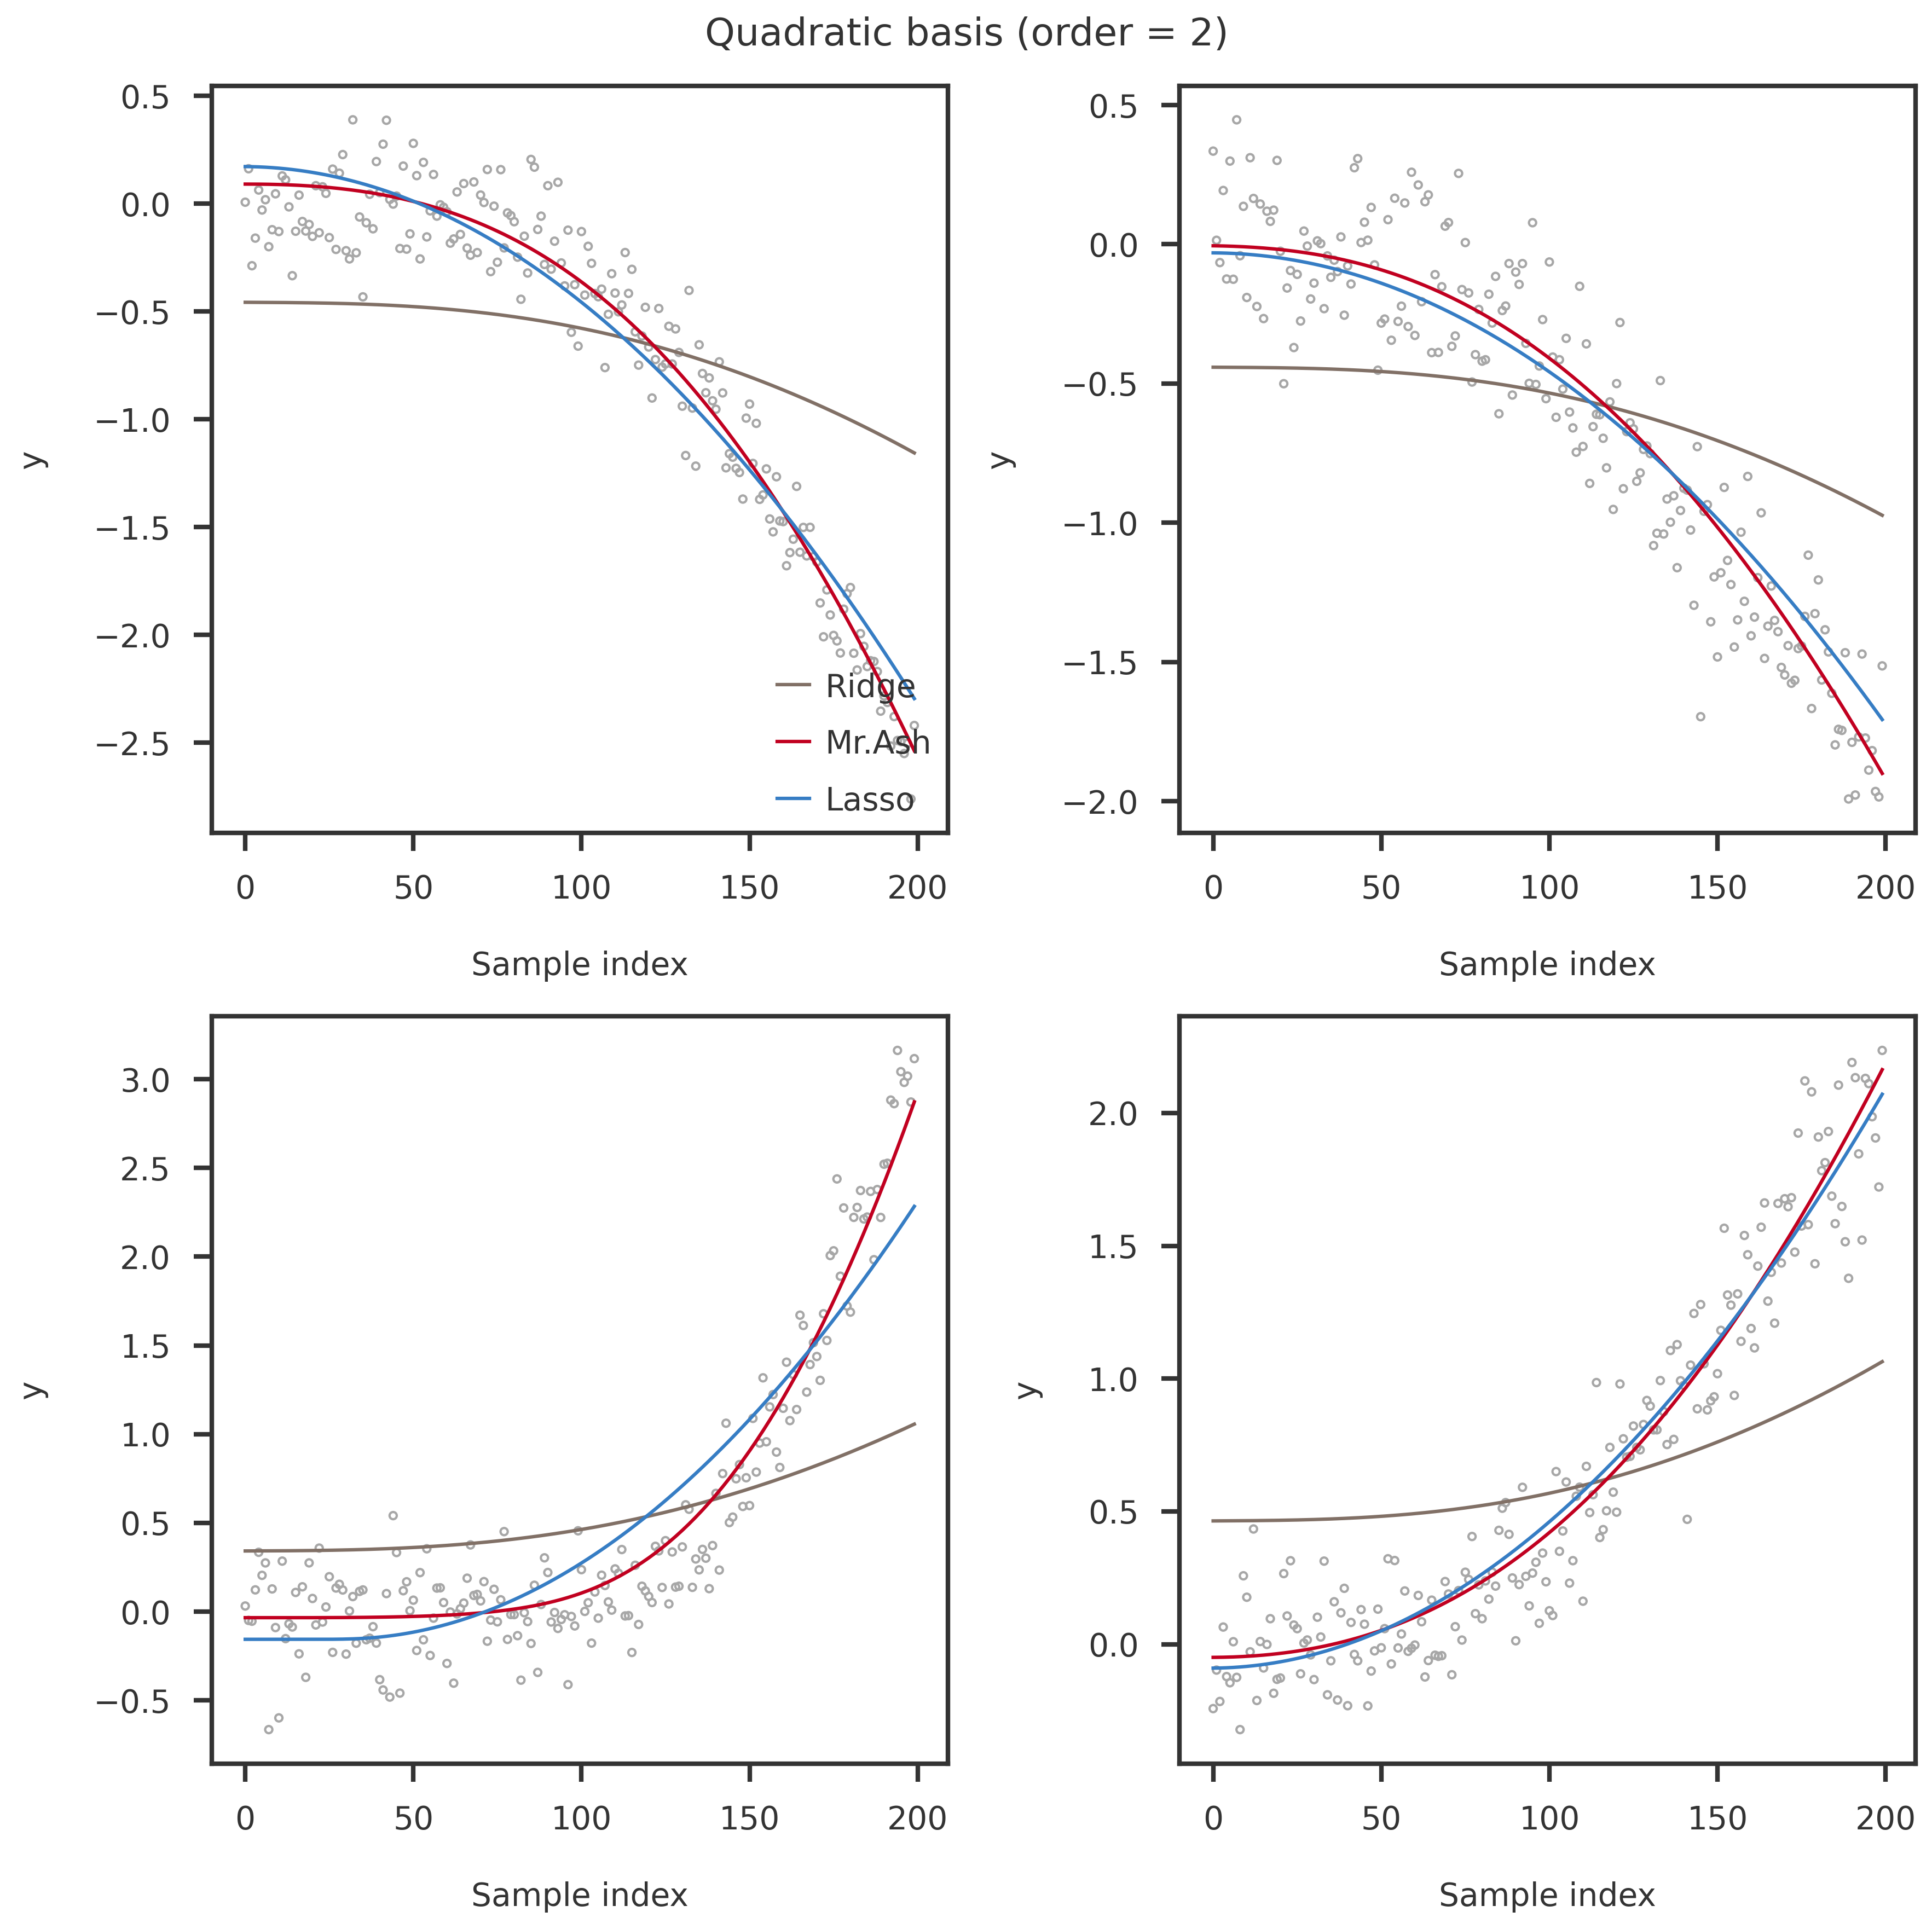

In [6]:
fig = plt.figure(figsize = (12, 12))
axlist = list()
plot_iter = [1, 11, 16, 14]
order = 2
sfix = 4
mhandles = list()
mlabels = list()
for i, it in enumerate(plot_iter):
    ax = fig.add_subplot(2, 2, i+1)
    X, y, Xtest, ytest, beta, se, ypred, b0pred, b1pred \
        = dsc_extract.changepoint_predictions(dsc_outdir, methods,
                                              order = order, sfix = sfix, dsc_iter = it)
    ax.scatter(np.arange(y.shape[0]), ytest, color = '#A7A7A7', facecolor = 'None', s = 10)
    for method in methods: 
        pm = methodprops.plot_metainfo()[method]
        ax.plot(np.arange(y.shape[0]), ypred[method], color = pm.color, label = pm.label)
        if i == 0:
            ax.legend(loc = 'lower right')
    ax.set_xlabel('Sample index')
    ax.set_ylabel('y')
    axlist.append(ax)
fig.suptitle('Quadratic basis (order = 2)')
plt.tight_layout()
plt.show()